In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
##Reading the diabetes file
data = pd.read_csv(r"C:\Users\SyedImam\anaconda3\diabetes.csv",)
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


array([[<AxesSubplot:title={'center':'pregnancies'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'diastolic'}>],
       [<AxesSubplot:title={'center':'triceps'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'dpf'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'diabetes'}>]], dtype=object)

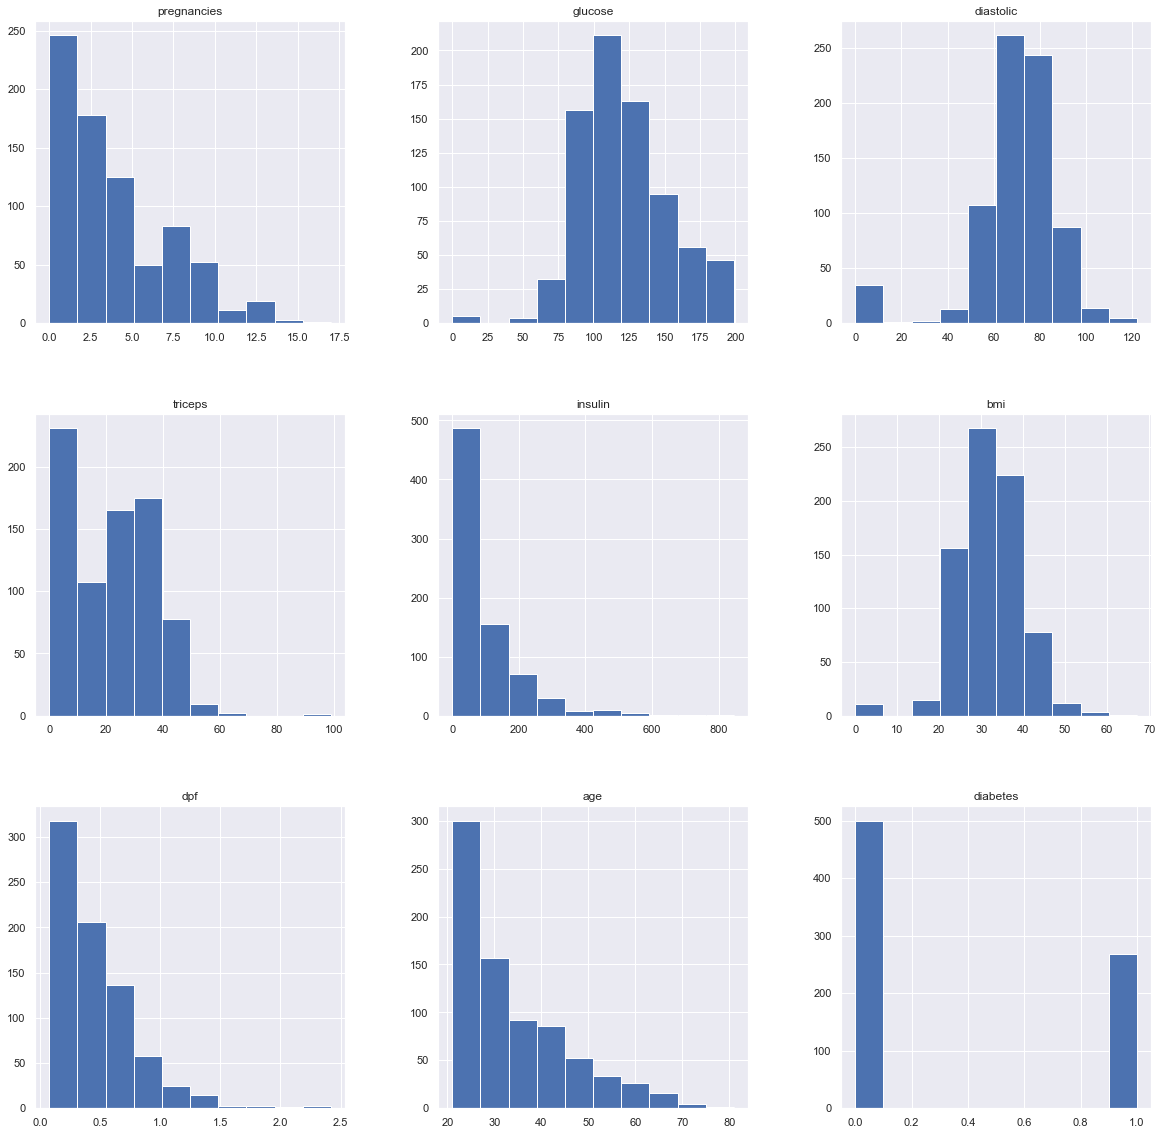

In [26]:
## To fill zeros first replace with nan then fill them according to their distribution
data.hist(figsize = (20,20))

In [27]:
##replacing zeros with nan

diabetes_1 = data.copy()
diabetes_1[['glucose','diastolic','triceps','insulin','bmi']] = diabetes_1[['glucose','diastolic','triceps','insulin','bmi']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_1.isnull().sum())

pregnancies      0
glucose          5
diastolic       35
triceps        227
insulin        374
bmi             11
dpf              0
age              0
diabetes         0
dtype: int64


In [28]:
## fill nan with value which are mostly present as per their distribution

diabetes_1['glucose'].fillna(diabetes_1['glucose'].mean(), inplace = True)
diabetes_1['diastolic'].fillna(diabetes_1['diastolic'].mean(), inplace = True)
diabetes_1['triceps'].fillna(diabetes_1['triceps'].median(), inplace = True)
diabetes_1['insulin'].fillna(diabetes_1['insulin'].median(), inplace = True)
diabetes_1['bmi'].fillna(diabetes_1['bmi'].median(), inplace = True)


array([[<AxesSubplot:title={'center':'pregnancies'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'diastolic'}>],
       [<AxesSubplot:title={'center':'triceps'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'dpf'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'diabetes'}>]], dtype=object)

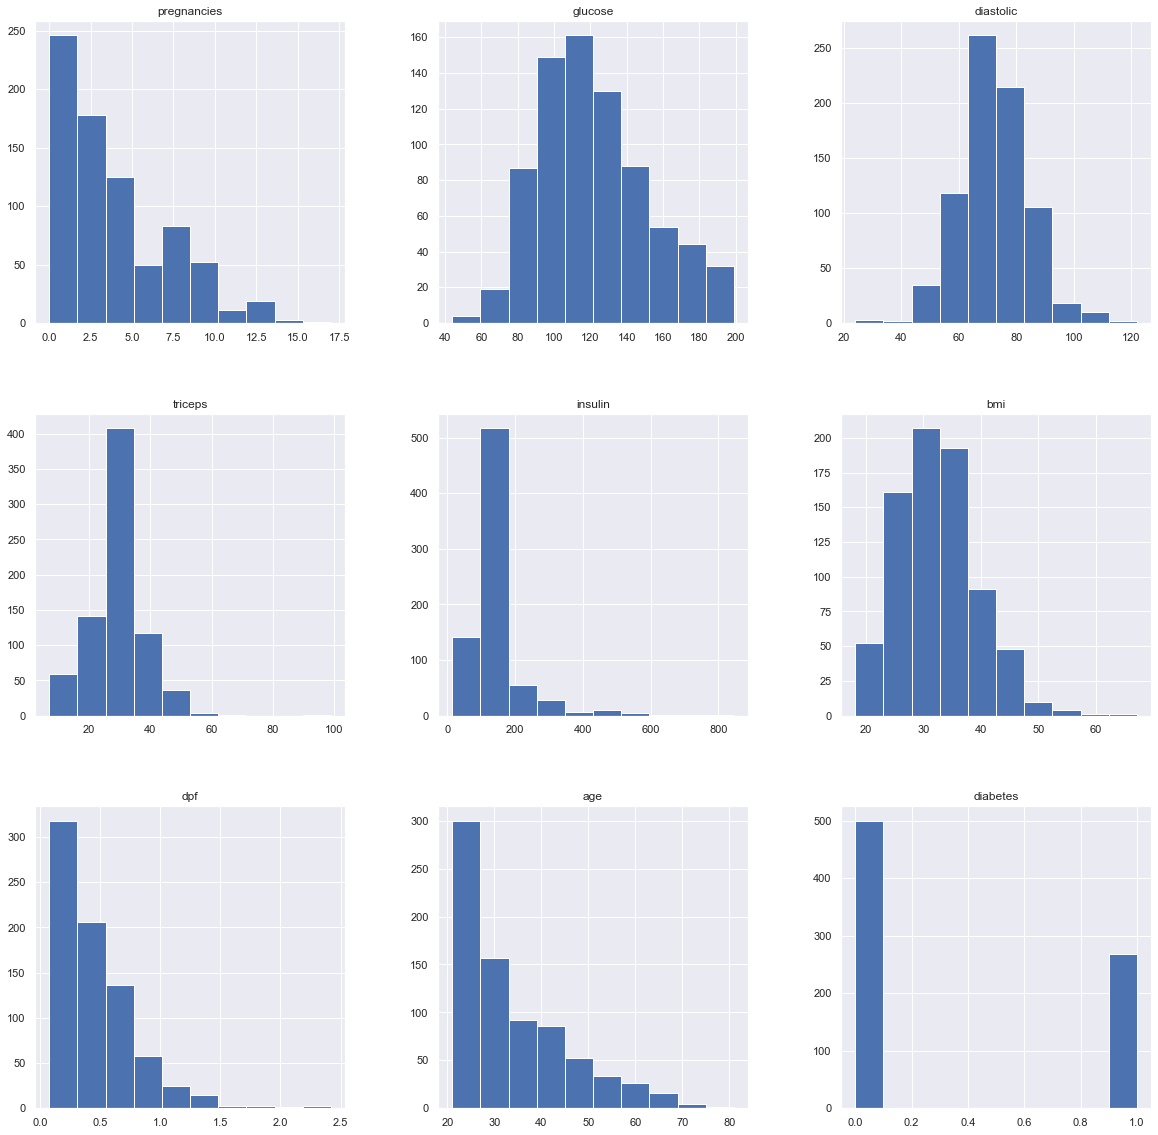

In [29]:
#plotting distribution after replacing nan with mean and median
diabetes_1.hist(figsize = (20,20))

In [30]:
## observing the shape of the data
data.shape

(768, 9)

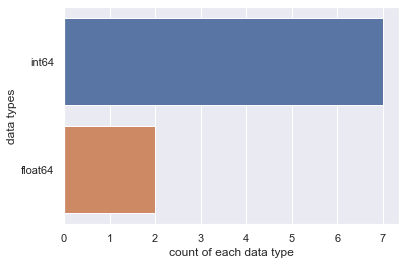

In [31]:
# data type plot 
sns.countplot(y=data.dtypes ,data=data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

0    500
1    268
Name: diabetes, dtype: int64


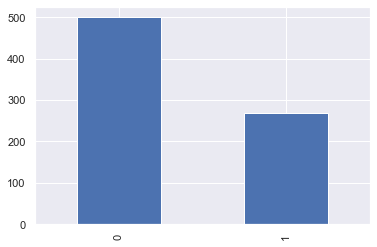

In [32]:
## checking the balance of the data by plotting the count of diabetes results
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = data["diabetes"].map(lambda x: color_wheel.get(x + 1))
print(data.diabetes.value_counts())
p = data.diabetes.value_counts().plot(kind="bar")

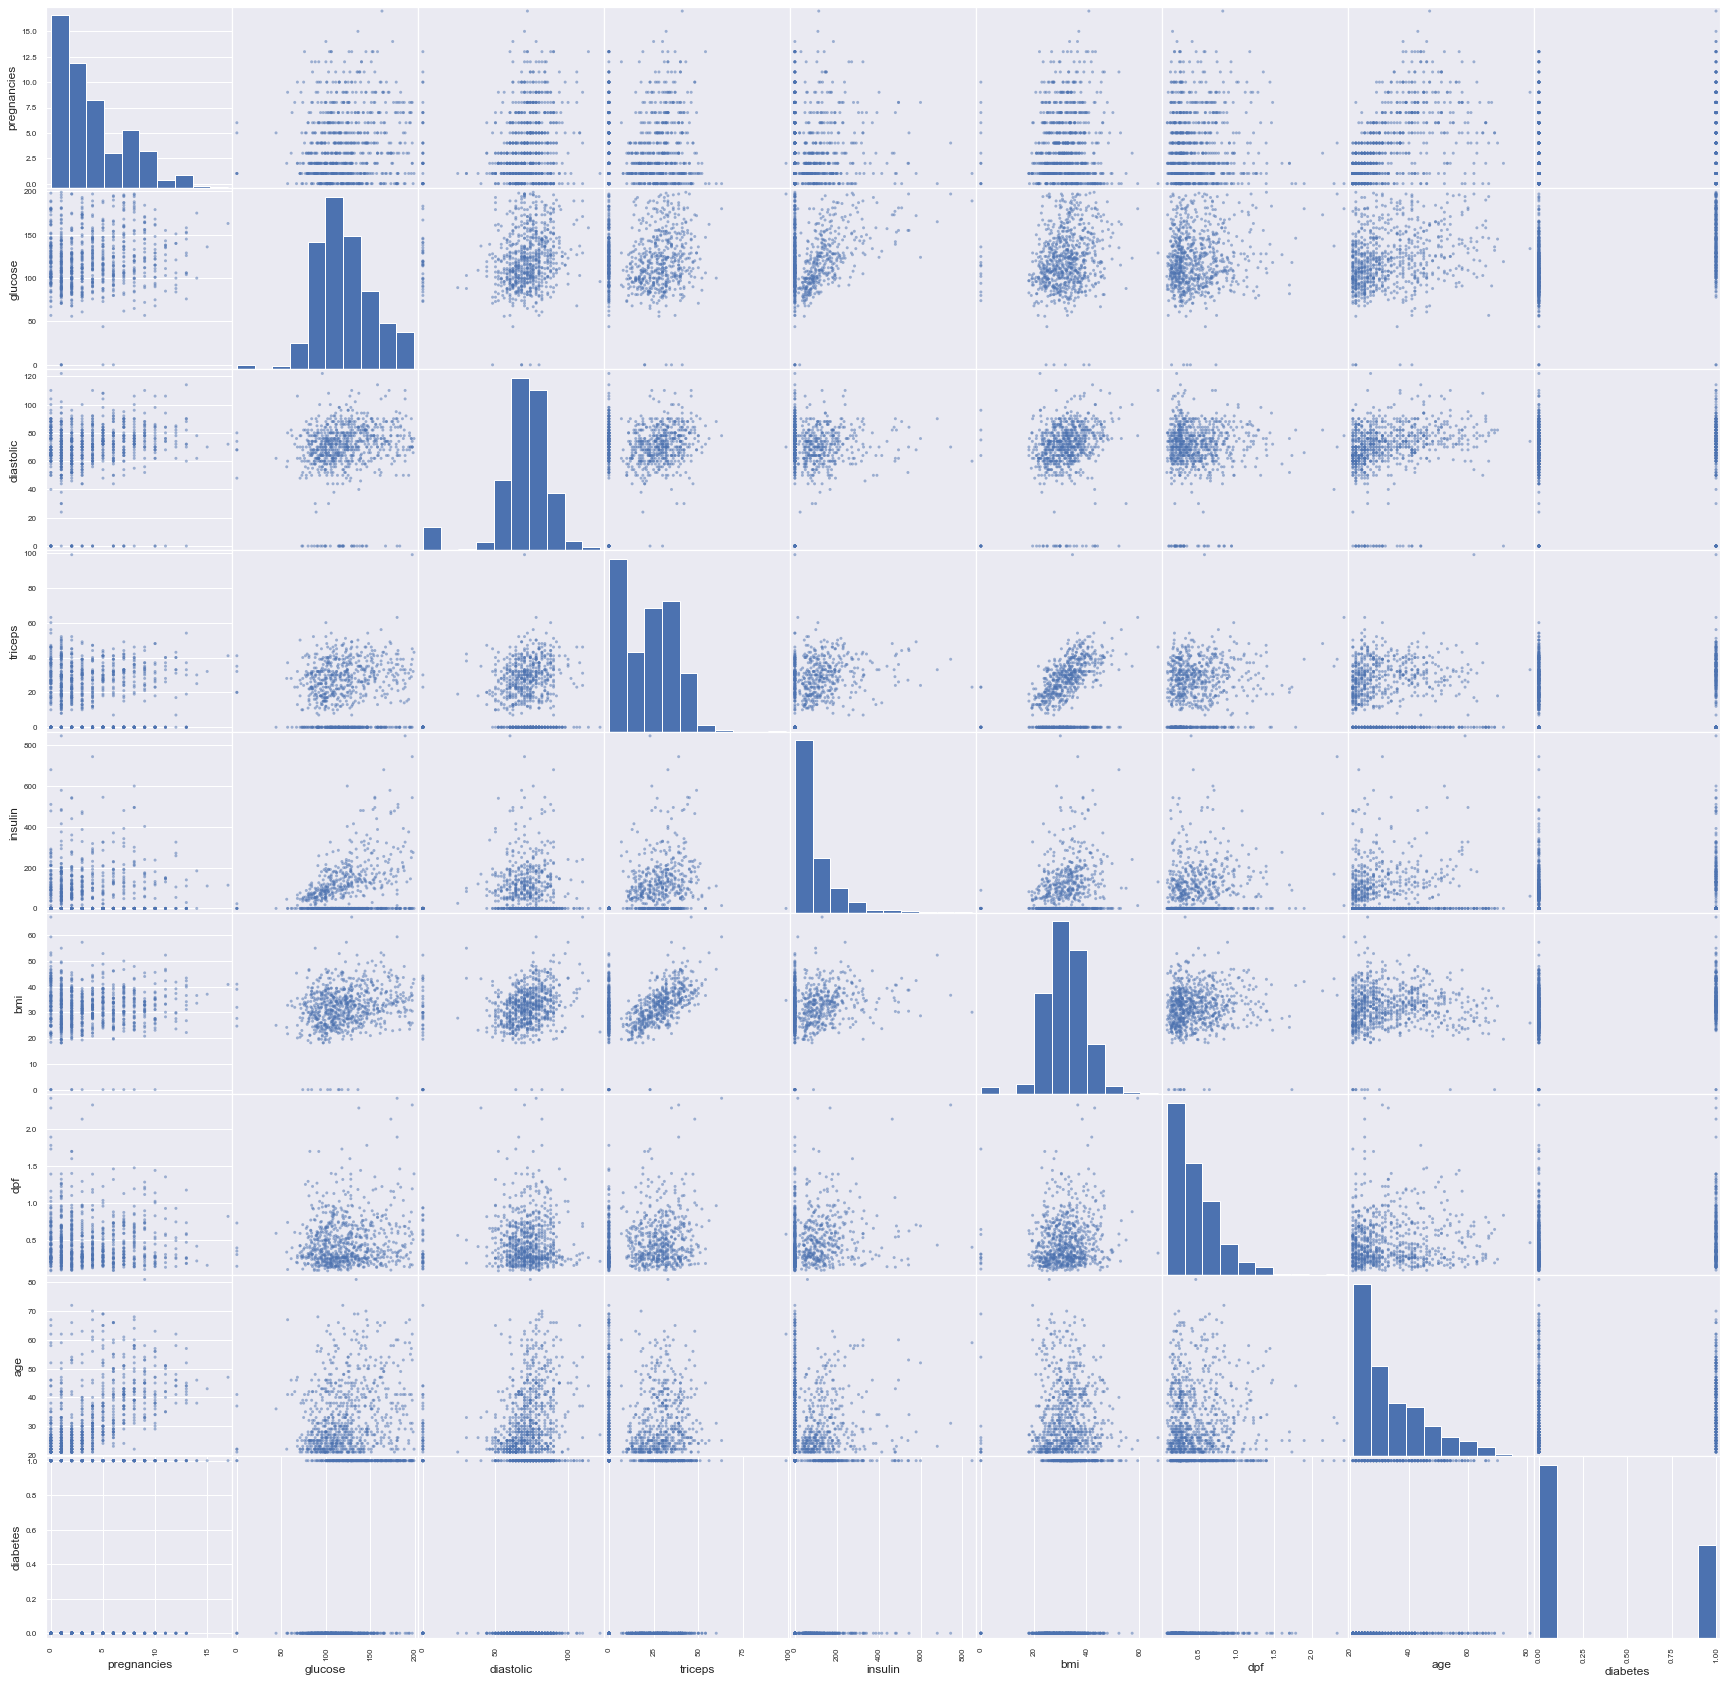

In [33]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(30,30))

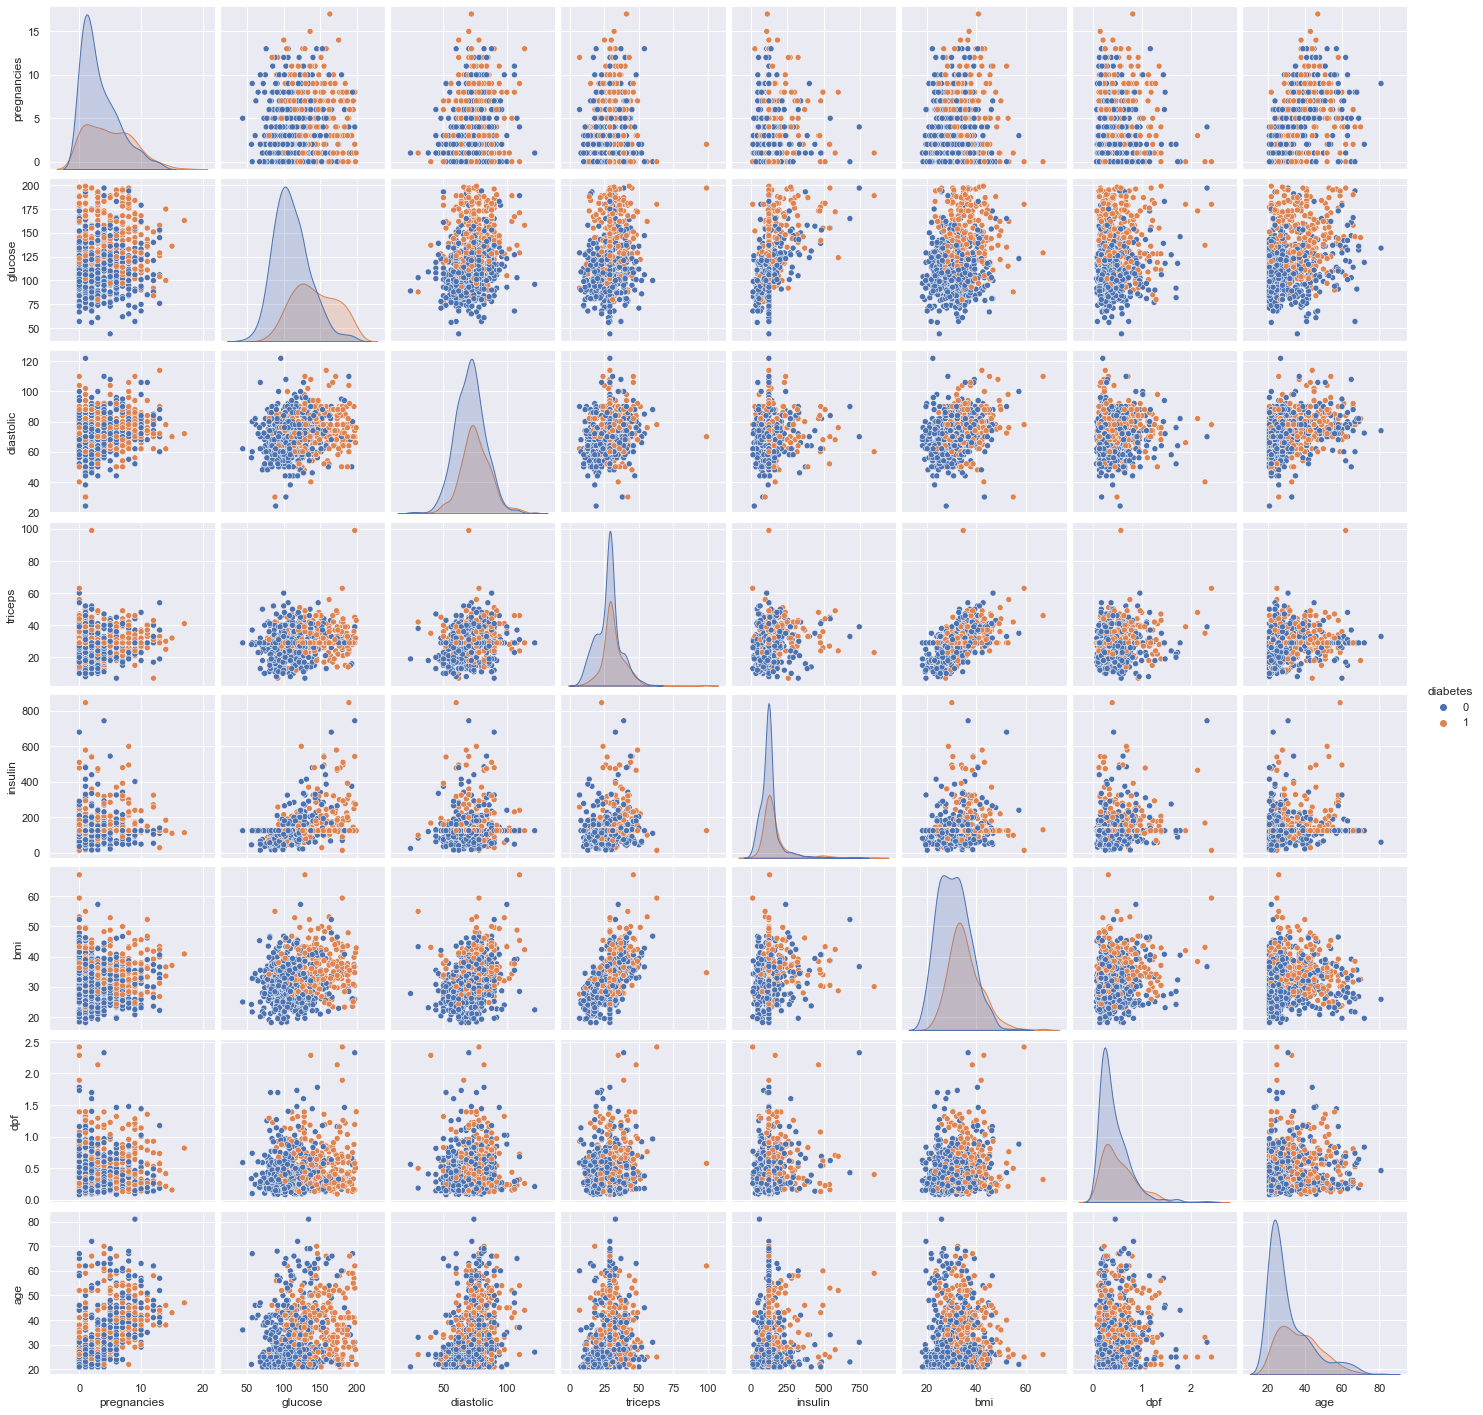

In [34]:
## pairplot for diabetes 1 or cleaned dataset
p=sns.pairplot(diabetes_1, hue = 'diabetes')

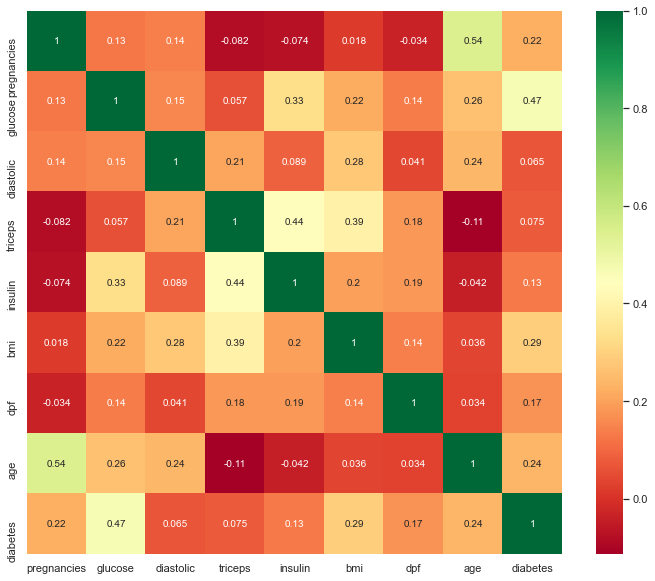

In [35]:
## Heatmap for uncleaned data
plt.figure(figsize=(12,10))
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn') 

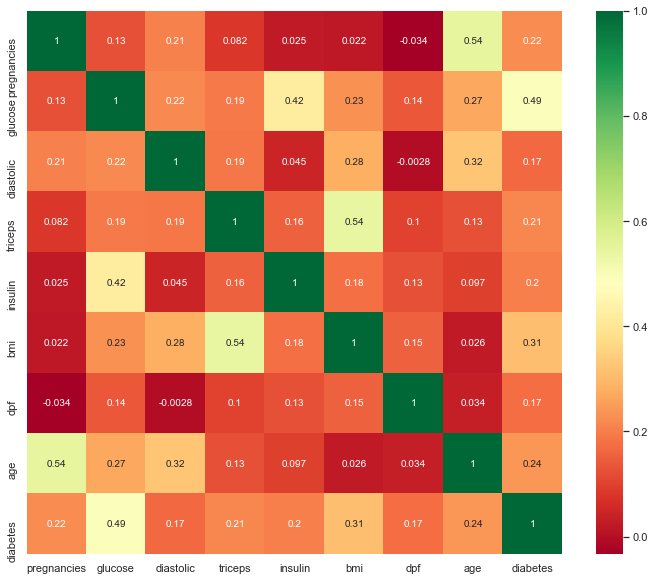

In [36]:
## heatmap for cleaned 
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_1.corr(), annot=True,cmap ='RdYlGn')

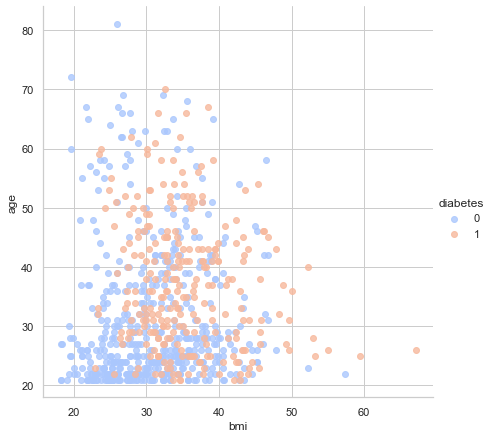

In [37]:
## Scatter plot with 2 main contributor of diabetes bmi and age
sns.set_style('whitegrid')
sns.lmplot('bmi','age',data=diabetes_1, hue='diabetes',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

In [38]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(diabetes_1)

KMeans(n_clusters=2)

In [39]:
kmeans.cluster_centers_

array([[3.86376404e+00, 1.18933194e+02, 7.24314346e+01, 2.89185393e+01,
        1.21214888e+02, 3.22175562e+01, 4.63367978e-01, 3.32022472e+01,
        3.35674157e-01],
       [3.60714286e+00, 1.56696429e+02, 7.20714286e+01, 3.15178571e+01,
        3.88053571e+02, 3.54767857e+01, 5.80053571e-01, 3.37321429e+01,
        5.17857143e-01]])

In [40]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
diabetes_1['cluster'] = diabetes_1['diabetes'].apply(converter)
diabetes_1.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes,cluster
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0


### Model Performance Analysis
1. Confusion Matrix
The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

In the famous cancer example:
Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.¶

In [41]:
print("Confusion Matrix: \n" ,confusion_matrix(diabetes_1['cluster'],kmeans.labels_))
print(classification_report(diabetes_1['cluster'],kmeans.labels_))

Confusion Matrix: 
 [[712  56]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       768
           1       0.00      0.00      0.00         0

    accuracy                           0.93       768
   macro avg       0.50      0.46      0.48       768
weighted avg       1.00      0.93      0.96       768



### https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec#:~:text=F1%2DScore%20is%20a%20measure,than%20the%20traditional%20arithmetic%20mean.

#### Precision
Precision is a measure of how many of the positive predictions made are correct (true positives). 

#### Recall / Sensitivity
Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data. It is sometimes also referred to as Sensitivity.

#### Specificity
Specificity is a measure of how many negative predictions made are correct (true negatives)

#### F1-Score
F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two. Harmonic mean is just another way to calculate an “average” of values, generally described as more suitable for ratios (such as precision and recall) than the traditional arithmetic mean.
    